<a href="https://colab.research.google.com/github/anuragbisht12/Machine-Learning-Algorithms/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, adj
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [8]:

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
 train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

In [10]:
reg=LinearRegression()

In [11]:
reg.fit(diabetes_X_train,diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
reg.coef_

array([998.57768914])

In [22]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [13]:
# Make predictions using the testing set
diabetes_y_pred = reg.predict(diabetes_X_test)

In [14]:
mean_squared_error(diabetes_y_test,diabetes_y_pred)

4061.8259284949268

In [15]:
r2_score(diabetes_y_test,diabetes_y_pred)

0.23335039815872138

([], <a list of 0 Text major ticklabel objects>)

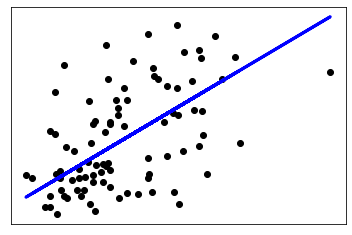

In [21]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

Text(0, 0.5, 'Residual')

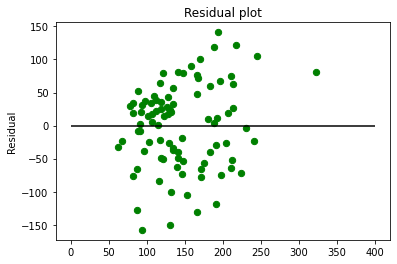

In [25]:
#Residual plot
plt.scatter(diabetes_y_pred, diabetes_y_pred - diabetes_y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=400)
plt.title('Residual plot')
plt.ylabel('Residual')

In [19]:
import statsmodels.api as sm
model= sm.OLS(diabetes_X_train, diabetes_y_train).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.091
Method:                 Least Squares   F-statistic:                              36.38
Date:                Fri, 26 Jun 2020   Prob (F-statistic):                    4.10e-09
Time:                        14:37:04   Log-Likelihood:                          594.01
No. Observations:                 353   AIC:                                     -1186.
Df Residuals:                     352   BIC:                                     -1182.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.388e-05   1.39e-05      6.032      0.000    5.65e-05       0.000
==============================================================================
Omnibus:                       16.311   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.774
Skew:                           0.549   Prob(JB):                     0.000138
Kurtosis:                       2.946   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----

Adjusted R2 score=1-(1-R^2)(n-1)/(n-k-1)


 n: sample size
 
k: number of independent variables in equation

**Problems with R2**

R2 increases with every predictor added to a model. As R2 always increases and never decreases, it can appear to be a better fit with the more terms you add to the model. This can be completely misleading.
Similarly, if your model has too many terms and too many high-order polynomials you can run into the problem of over-fitting the data. When you over-fit data, a misleadingly high R2 value can lead to misleading projections.

How Adjusted R2 Penalizes You
The adjusted R2 will penalize you for adding independent variables (K in the equation) that do not fit the model. Why? In regression analysis, it can be tempting to add more variables to the data as you think of them. Some of those variables will be significant, but you can’t be sure that significance is just by chance. The adjusted R2 will compensate for this by that penalizing you for those extra variables.

While values are usually positive, they can be negative as well. This could happen if your R2 is zero; After the adjustment, the value can dip below zero. This usually indicates that your model is a poor fit for your data. Other problems with your model can also cause sub-zero values, such as not putting a constant term in your model.